In [1]:
%pip install geopandas folium matplotlib mapclassify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
denuncias = pd.read_csv("../data/processed/denuncias.csv")
establecimientos = pd.read_csv("../data/processed/establecimientos.csv")
matriculas = pd.read_csv("../data/processed/matriculas.csv")
sep_ee = pd.read_csv("../data/processed/sep_establecimientos.csv")

In [4]:
establecimientos

Unnamed: 0  agno    rbd                               nom_rbd  \
0                0  2014      1               LICEO POLITECNICO ARICA   
1                1  2014      2             PARVULARIO LAS ESPIGUITAS   
2                2  2014      3   ESC. PEDRO VICENTE GUTIERREZ TORRES   
3                3  2014      4             LICEO OCTAVIO PALMA PEREZ   
4                4  2014      5              JOVINA NARANJO FERNANDEZ   
...            ...   ...    ...                                   ...   
158420      158420  2023  42195  SALA CUNA Y JARDIN INFANTIL ARBOLITO   
158421      158421  2023  42196          SALA CUNA QUITRAL MONTESSORI   
158422      158422  2023  42197   SALA CUNA NIDO ALEXANDER MONTESSORI   
158423      158423  2023  42198           COLEGIO DE ADULTOS AMANECER   
158424      158424  2023  42200                             PAPELUCHO   

        cod_reg_rbd  cod_com_rbd nom_com_rbd  cod_depe  cod_depe2  rural_rbd  \
0                15        15101       ARICA         2          1          0   
1                15        15101       ARICA         2          1          0   
2                15        15101       ARICA         2          1          1   
3                15        15101       ARICA         2          1          0   
4                15        15101       ARICA         2          1          0   
...             ...          ...         ...       ...        ...        ...   
158420           13        13130  SAN MIGUEL         4          3          0   
158421           13        13302       LAMPA         4          3          0   
158422           13        13114  LAS CONDES         4          3          0   
158423           13        13124    PUDAHUEL         3          2          0   
158424            9         9102     CARAHUE         4          3          0   

          latitud   longitud  convenio_pie  ori_religiosa  pago_matricula  \
0      -18.487274 -70.294739             1              2               1   
1      -18.469862 -70.302757             1              2               1   
2      -18.503580 -70.260826             0              2               1   
3      -18.474243 -70.308266             1              1               1   
4      -18.476904 -70.313454             1              7               1   
...           ...        ...           ...            ...             ...   
158420        NaN        NaN             0              9               0   
158421        NaN        NaN             0              9               0   
158422        NaN        NaN             0              9               0   
158423        NaN        NaN             0              9               0   
158424        NaN        NaN             0              9               0   

        pago_mensual  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
158420             0  
158421             0  
158422             0  
158423             0  
158424             0  

[158425 rows x 16 columns]

In [5]:
establecimientos["longitud"] = establecimientos["longitud"].replace(0, pd.NA)
establecimientos["latitud"] = establecimientos["latitud"].replace(0, pd.NA)

In [6]:
establecimientos["longitud"] = pd.to_numeric(establecimientos["longitud"])
establecimientos["latitud"] = pd.to_numeric(establecimientos["latitud"])

In [45]:
latest_data = establecimientos.sort_values('agno').groupby('rbd').last(numeric_only=True).reset_index()

In [46]:
latest_data

rbd  agno  cod_reg_rbd  cod_com_rbd  cod_depe  cod_depe2  rural_rbd  \
0          1  2023           15        15101         6          5          0   
1          2  2023           15        15101         6          5          0   
2          3  2023           15        15101         6          5          1   
3          4  2023           15        15101         6          5          0   
4          5  2023           15        15101         6          5          0   
...      ...   ...          ...          ...       ...        ...        ...   
16693  42195  2023           13        13130         4          3          0   
16694  42196  2023           13        13302         4          3          0   
16695  42197  2023           13        13114         4          3          0   
16696  42198  2023           13        13124         3          2          0   
16697  42200  2023            9         9102         4          3          0   

         latitud   longitud  convenio_pie  ori_religiosa  pago_matricula  \
0     -18.487200 -70.295212             1              2               1   
1     -18.469862 -70.302757             1              2               1   
2     -18.503580 -70.260826             0              1               1   
3     -18.474239 -70.308273             1              1               1   
4     -18.476900 -70.313454             1              7               1   
...          ...        ...           ...            ...             ...   
16693        NaN        NaN             0              9               0   
16694        NaN        NaN             0              9               0   
16695        NaN        NaN             0              9               0   
16696        NaN        NaN             0              9               0   
16697        NaN        NaN             0              9               0   

       pago_mensual  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
16693             0  
16694             0  
16695             0  
16696             0  
16697             0  

[16698 rows x 13 columns]

In [122]:
latest_data[latest_data["agno"] == 2023]["rbd"].nunique()

16659

In [48]:
gdf_establecimientos = gpd.GeoDataFrame(latest_data.dropna(subset=['longitud', "latitud"]), geometry=gpd.points_from_xy(latest_data.dropna(subset=['longitud', "latitud"])["longitud"], latest_data.dropna(subset=['longitud', "latitud"])["latitud"]), crs="EPSG:4326")

In [49]:
gdf_establecimientos.head(3)

rbd  agno  cod_reg_rbd  cod_com_rbd  cod_depe  cod_depe2  rural_rbd  \
0    1  2023           15        15101         6          5          0   
1    2  2023           15        15101         6          5          0   
2    3  2023           15        15101         6          5          1   

     latitud   longitud  convenio_pie  ori_religiosa  pago_matricula  \
0 -18.487200 -70.295212             1              2               1   
1 -18.469862 -70.302757             1              2               1   
2 -18.503580 -70.260826             0              1               1   

   pago_mensual                     geometry  
0             1   POINT (-70.29521 -18.4872)  
1             1  POINT (-70.30276 -18.46986)  
2             1  POINT (-70.26083 -18.50358)

In [50]:
gdf_establecimientos.explore()

In [12]:
denuncias.drop(columns=["Unnamed: 0"], inplace=True)
establecimientos.drop(columns=["Unnamed: 0"], inplace=True)
matriculas.drop(columns=["Unnamed: 0"], inplace=True)
sep_ee.drop(columns=["Unnamed: 0"], inplace=True)

In [13]:
display(denuncias.head(1))
display(establecimientos.head(1))
display(matriculas.head(1))
display(sep_ee.head(1))

agno  den_canal  den_estado den_fec_creacion den_fec_termino_denuncia  \
0  2014          1           1       2014-01-02               2014-01-08   

   den_oficina  den_departamento   den_ambito                den_tema  \
0            2                 1  CONVIVENCIA  MEDIDAS DISCIPLINARIAS   

                                         den_subtema  den_sexo    rbd  
0  NO RENOVACIÓN O CANCELACIÓN DE MATRÍCULA A PÁR...         2  283.0

agno  rbd                  nom_rbd  cod_reg_rbd  cod_com_rbd nom_com_rbd  \
0  2014    1  LICEO POLITECNICO ARICA           15        15101       ARICA   

   cod_depe  cod_depe2  rural_rbd    latitud   longitud  convenio_pie  \
0         2          1          0 -18.487274 -70.294739             1   

   ori_religiosa  pago_matricula  pago_mensual  
0              2               1             1

agno  rbd                  nom_rbd  mat_hom_1  mat_muj_1  mat_hom_2  \
0  2014    1  LICEO POLITECNICO ARICA          0          0          0   

   mat_muj_2  mat_hom_3  mat_muj_3  mat_hom_4  ...  mat_muj_5  mat_hom_6  \
0          0          0          0          0  ...          0          0   

   mat_muj_6  mat_hom_7  mat_muj_7  mat_hom_8  mat_muj_8  mat_hom_tot  \
0          0        363        181        164        172          527   

   mat_muj_tot  mat_total  
0          353        880  

[1 rows x 22 columns]

agno  rbd clasificacion_sep  n_prio  n_ben  convenio_sep  n_prio_ben  \
0  2014    1         EMERGENTE     655    195           NaN         NaN   

   n_pref  n_pref_ben  
0     NaN         NaN

In [14]:
denuncias.columns

Index(['agno', 'den_canal', 'den_estado', 'den_fec_creacion',
       'den_fec_termino_denuncia', 'den_oficina', 'den_departamento',
       'den_ambito', 'den_tema', 'den_subtema', 'den_sexo', 'rbd'],
      dtype='object')

## Denuncias

<Axes: xlabel='agno'>

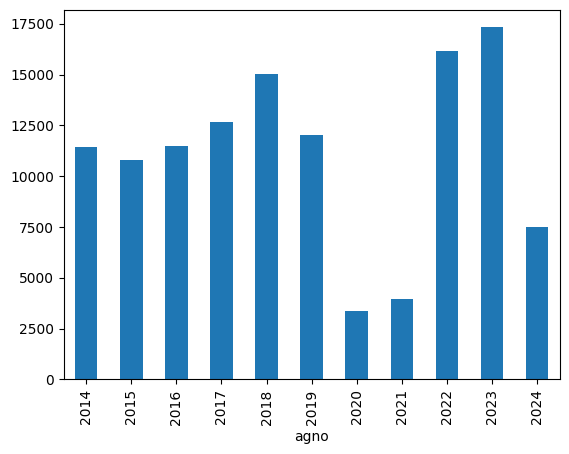

In [15]:
denuncias.groupby(["agno"]).size().plot(kind='bar')

<Axes: ylabel='den_ambito'>

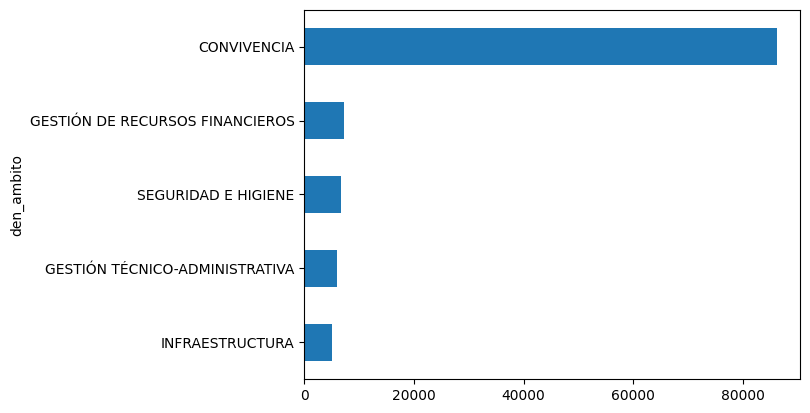

In [16]:
denuncias.groupby(["den_ambito"]).size().sort_values(ascending=True)[-5:].plot(kind='barh', )

<Axes: ylabel='den_tema'>

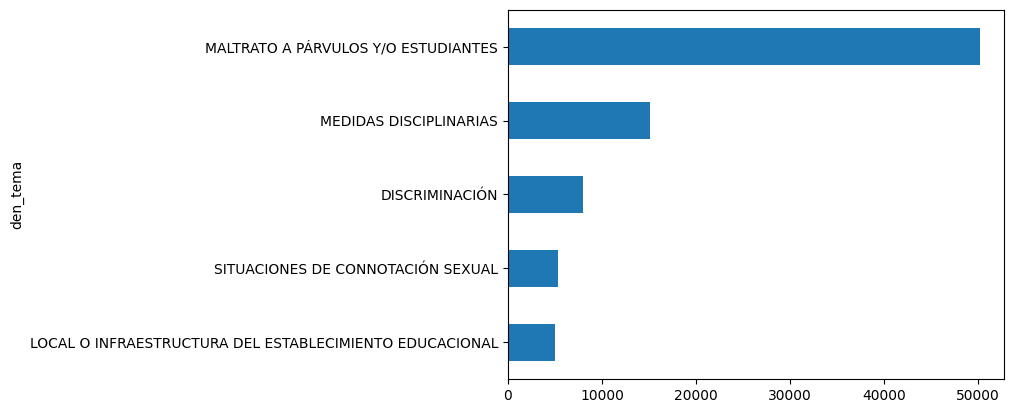

In [17]:
denuncias.groupby(["den_tema"]).size().sort_values(ascending=True)[-5:].plot(kind='barh', )

<Axes: ylabel='den_subtema'>

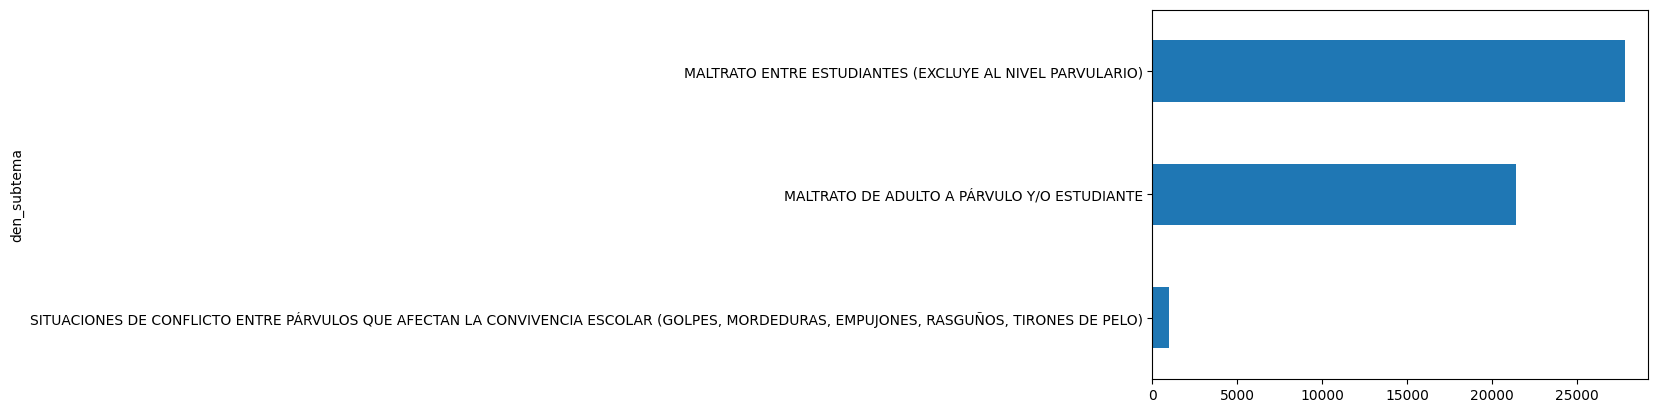

In [18]:
denuncias[denuncias["den_tema"] == "MALTRATO A PÁRVULOS Y/O ESTUDIANTES"].groupby(["den_subtema"]).size().sort_values(ascending=True)[-5:].plot(kind='barh', )

In [19]:
denuncias["den_fec_creacion"] = pd.to_datetime(denuncias["den_fec_creacion"])
denuncias["den_fec_termino_denuncia"] = pd.to_datetime(denuncias["den_fec_termino_denuncia"])

In [20]:
denuncias["duracion_denuncia"] = (denuncias["den_fec_termino_denuncia"] - denuncias["den_fec_creacion"]).dt.days

In [21]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
category_map = {
    1: '01: Protección de Derechos Educacionales',
    2: '02: Fiscalización',
    3: '03: Jurídica'
}
denuncias["den_departamento"] = denuncias["den_departamento"].map(category_map)

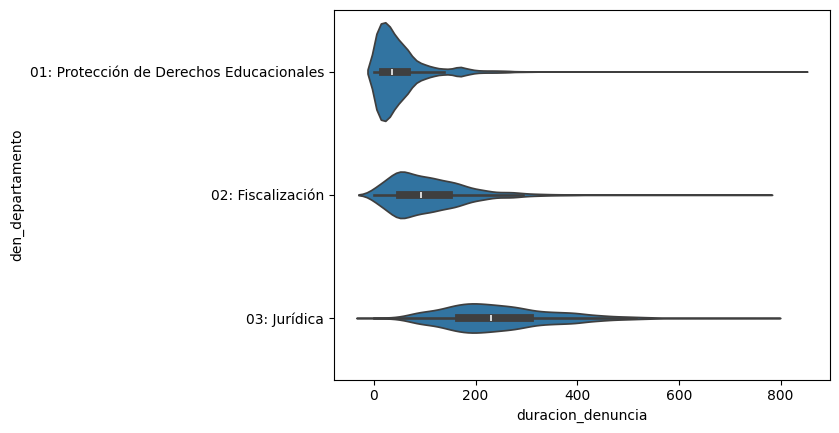

In [24]:
order = ['01: Protección de Derechos Educacionales', '02: Fiscalización', '03: Jurídica']


sns.violinplot(y=denuncias[denuncias["den_tema"] == "MALTRATO A PÁRVULOS Y/O ESTUDIANTES"]["den_departamento"], x=denuncias[denuncias["den_tema"] == "MALTRATO A PÁRVULOS Y/O ESTUDIANTES"]["duracion_denuncia"], order=order)
plt.show()

Destacar el porcentaje de denuncias que se demoran más en resolver

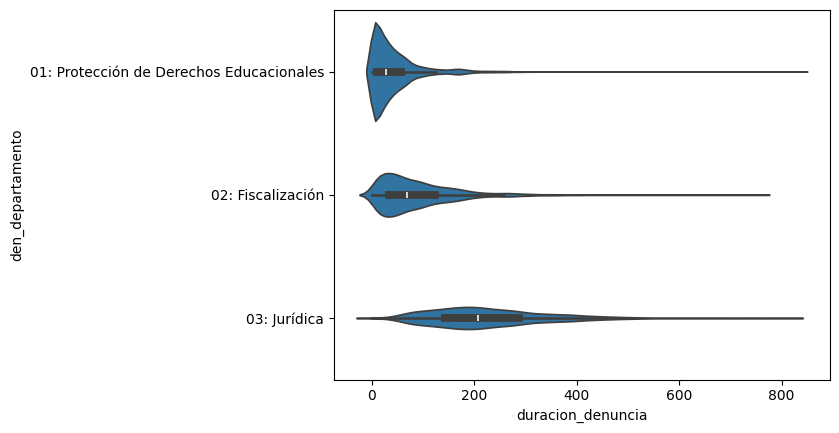

In [25]:
order = ['01: Protección de Derechos Educacionales', '02: Fiscalización', '03: Jurídica']


sns.violinplot(y=denuncias["den_departamento"], x=denuncias["duracion_denuncia"], order=order)
plt.show()

### Denuncias por matrícula

In [124]:
display(denuncias["rbd"].nunique())
display(denuncias[denuncias["agno"]==2023]["rbd"].nunique())

10221

5388

In [26]:
denuncias_agno_rbd = denuncias.drop(columns=['den_fec_creacion','den_fec_termino_denuncia']).groupby(["agno", "rbd"]).agg({'rbd':'count'}).rename(columns={'rbd': 'total_denuncias'}).reset_index()

In [27]:
matriculas = matriculas.merge(denuncias_agno_rbd, on=["agno", "rbd"])

In [119]:
matriculas[matriculas["agno"] == 2023]["rbd"].nunique()

5255

In [28]:
matriculas_totales = matriculas.groupby(["rbd"]).agg({'mat_total':'sum', 'total_denuncias':'sum'}).reset_index()

In [29]:
matriculas_totales

rbd  mat_total  total_denuncias
0         1       5674               23
1         2        385                2
2         4       8601               26
3         5       8021               26
4         7       9936               28
...     ...        ...              ...
9653  42133          0                1
9654  42162        312                1
9655  42175          0                1
9656  42178        160                4
9657  42186          0                2

[9658 rows x 3 columns]

<Axes: ylabel='Frequency'>

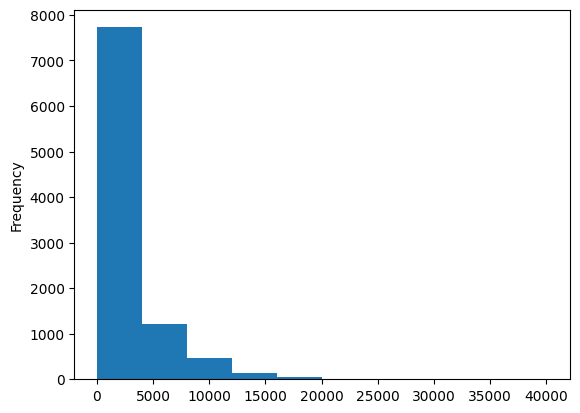

In [30]:
matriculas_totales['mat_total'].plot(kind="hist")

In [31]:
matriculas_totales['mat_total'] = pd.to_numeric(matriculas_totales['mat_total'].replace(0, pd.NA))

In [40]:
import numpy as np
matriculas_totales["den_per_100"] = matriculas_totales["total_denuncias"].divide(matriculas_totales['mat_total']*0.01).replace(np.inf, 0)

In [43]:

matriculas_totales.merge(latest_data, on="rbd").head(2)

rbd  mat_total  total_denuncias  den_per_100  Unnamed: 0  agno  \
0    1     5674.0               23     0.405358      141766  2023   
1    2      385.0                2     0.519481      141767  2023   

                     nom_rbd  cod_reg_rbd  cod_com_rbd nom_com_rbd  cod_depe  \
0    LICEO POLITECNICO ARICA           15        15101       ARICA         6   
1  PARVULARIO LAS ESPIGUITAS           15        15101       ARICA         6   

   cod_depe2  rural_rbd    latitud   longitud  convenio_pie  ori_religiosa  \
0          5          0 -18.487200 -70.295212             1              2   
1          5          0 -18.469862 -70.302757             1              2   

   pago_matricula  pago_mensual  
0               1             1  
1               1             1

np.float64(1.0)

In [42]:
matriculas_denuncias = matriculas_totales.merge(latest_data, on="rbd")

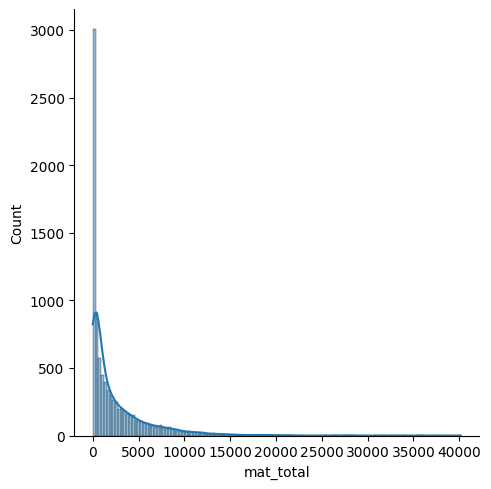

In [65]:

sns.displot(data=matriculas_denuncias["mat_total"], kde=True)

In [64]:
smallest_10pc_mat_den = matriculas_denuncias.nsmallest(n=int(len(matriculas_denuncias) * 0.1), columns="mat_total")

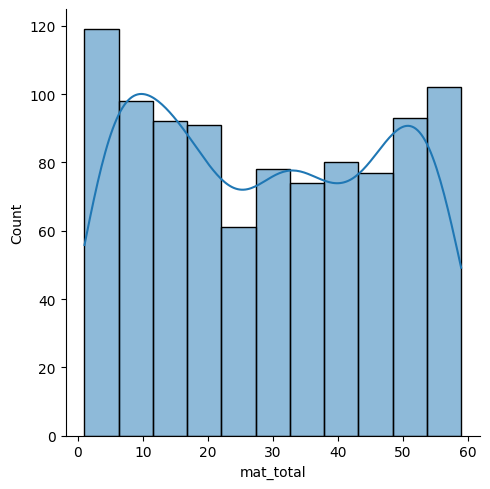

In [76]:
sns.displot(data=smallest_10pc_mat_den["mat_total"], kde=True)

El 10% de los datos corresponden a EE que no han tenido más de 50 matrículas

In [67]:
mat_den_flitered = matriculas_denuncias[matriculas_denuncias["mat_total"] > 50]

In [62]:
matriculas_denuncias.sort_values(by=["den_per_100"], ascending=False).head(2)

rbd  mat_total  total_denuncias  den_per_100  Unnamed: 0  agno  \
52       87        1.0                3        300.0      141834  2023   
6174  14886        1.0                3        300.0      152482  2023   

                          nom_rbd  cod_reg_rbd  cod_com_rbd    nom_com_rbd  \
52             ESCUELA ANCOLACANE           15        15202  GENERAL LAGOS   
6174  ESCUELA DE PARVULOS LILIPUT            5         5501       QUILLOTA   

      cod_depe  cod_depe2  rural_rbd    latitud   longitud  convenio_pie  \
52           6          5          1 -17.854719 -69.606133             0   
6174         3          2          0 -32.873867 -71.244316             0   

      ori_religiosa  pago_matricula  pago_mensual  
52                2               1             1  
6174              1               4             5

In [68]:
mat_den_flitered.sort_values(by=["den_per_100"], ascending=False).head(2)

rbd  mat_total  total_denuncias  den_per_100  Unnamed: 0  agno  \
7343  20473       56.0               21    37.500000      154383  2023   
6830  17830       54.0               12    22.222222      153574  2023   

                                                nom_rbd  cod_reg_rbd  \
7343                                 COLEGIO SAN BENITO            7   
6830  CENTRO PSICOPEDAGÓGICO DE ESTIMULACIÓN TEMPRAN...            8   

      cod_com_rbd  nom_com_rbd  cod_depe  cod_depe2  rural_rbd   latitud  \
7343         7101        TALCA         3          2          0 -35.44009   
6830         8301  LOS ÁNGELES         3          2          0 -37.47457   

      longitud  convenio_pie  ori_religiosa  pago_matricula  pago_mensual  
7343 -71.67067             0              9               0             0  
6830 -72.34909             0              1               1             1

<Axes: xlabel='den_per_100', ylabel='nom_rbd'>

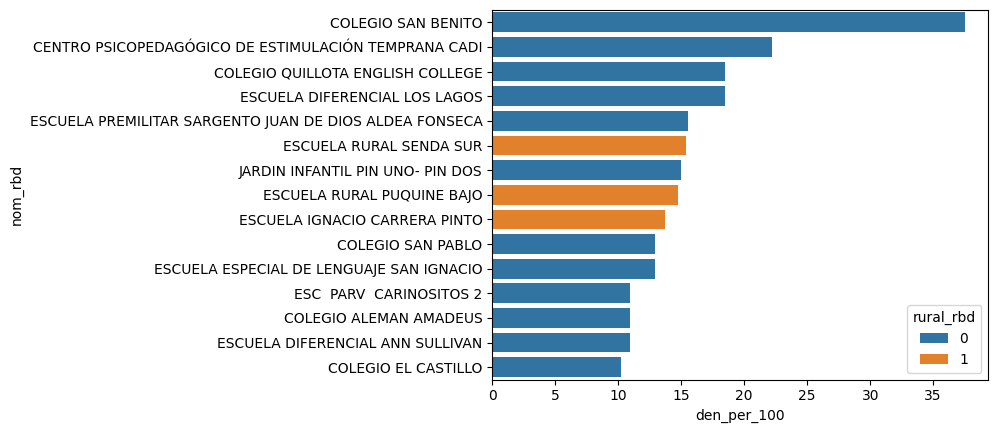

In [78]:
largest_mat_den = mat_den_flitered.nlargest(n=15, columns=["den_per_100"])

sns.barplot(x=largest_mat_den["den_per_100"], y=largest_mat_den["nom_rbd"],orient="h", hue=largest_mat_den["rural_rbd"])

<Axes: xlabel='total_denuncias', ylabel='nom_rbd'>

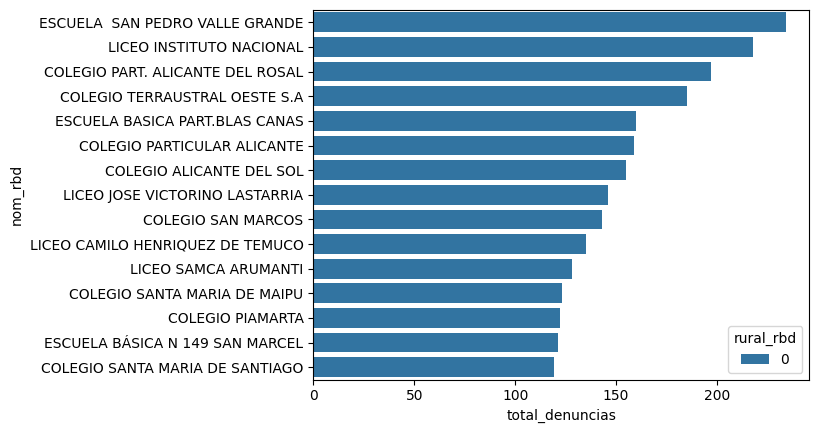

In [79]:
largest_tot_den = mat_den_flitered.nlargest(n=15, columns=["total_denuncias"])

sns.barplot(x=largest_tot_den["total_denuncias"], y=largest_tot_den["nom_rbd"],orient="h", hue=largest_tot_den["rural_rbd"])

In [80]:
largest10_tot_den = mat_den_flitered.nlargest(n=int(len(mat_den_flitered)* 0.1), columns=["total_denuncias"])
largest10_den_per_100 = mat_den_flitered.nlargest(n=int(len(mat_den_flitered)* 0.1), columns=["den_per_100"])

In [ ]:
sns.displot(data=largest10_tot_den["mat_total"], kde=True)

<Axes: xlabel='mat_total', ylabel='Count'>

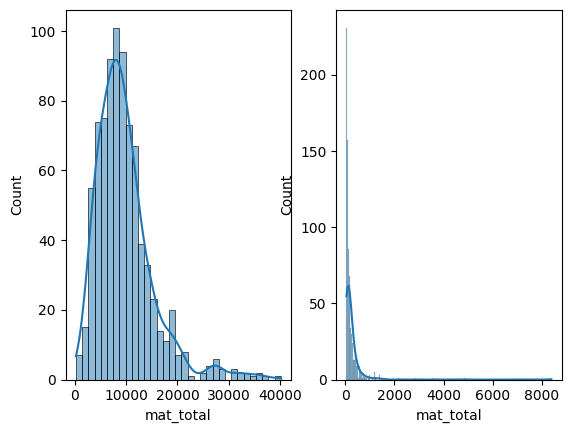

In [89]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2)
sns.histplot(data=largest10_tot_den["mat_total"], kde=True, ax=axs[0])
sns.histplot(data=largest10_den_per_100["mat_total"], kde=True, ax=axs[1])


<Axes: xlabel='pago_matricula'>

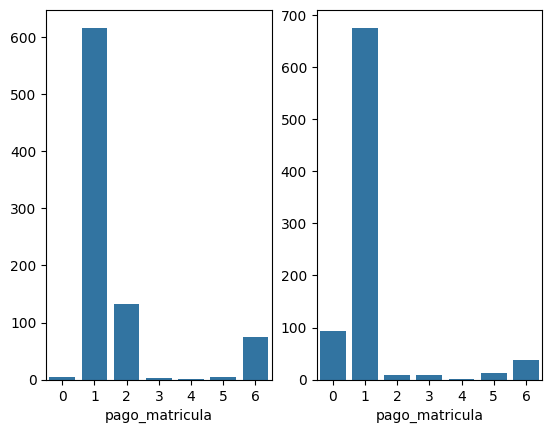

In [97]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=largest10_tot_den.groupby(["pago_matricula"]).size(), ax=axs[0])
sns.barplot(data=largest10_den_per_100.groupby(["pago_matricula"]).size(), ax=axs[1])

<Axes: xlabel='pago_mensual'>

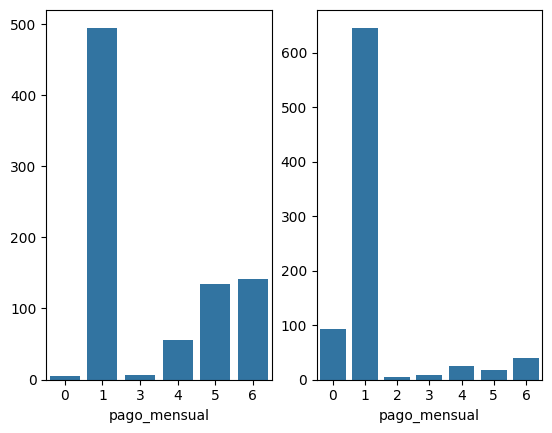

In [99]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=largest10_tot_den.groupby(["pago_mensual"]).size(), ax=axs[0])
sns.barplot(data=largest10_den_per_100.groupby(["pago_mensual"]).size(), ax=axs[1])

<Axes: xlabel='pago_mensual'>

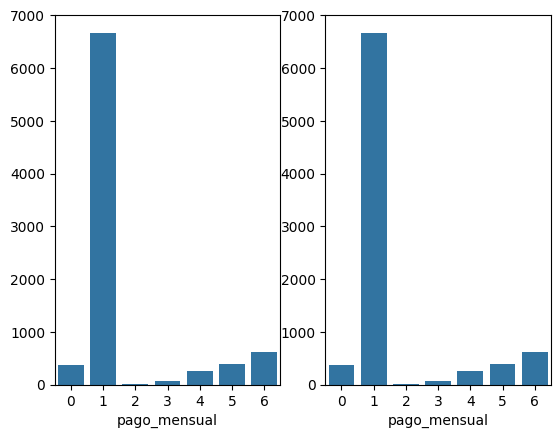

In [100]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=mat_den_flitered.groupby(["pago_mensual"]).size(), ax=axs[0])
sns.barplot(data=mat_den_flitered.groupby(["pago_mensual"]).size(), ax=axs[1])